# 1. Introduction and basetable structure

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
basetable = pd.read_csv('data/basetable_ex2_4.csv')
basetable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
target                   25000 non-null int64
gender_F                 25000 non-null int64
income_high              25000 non-null int64
income_low               25000 non-null int64
country_USA              25000 non-null int64
country_India            25000 non-null int64
country_UK               25000 non-null int64
age                      25000 non-null int64
time_since_last_gift     25000 non-null int64
time_since_first_gift    25000 non-null int64
max_gift                 25000 non-null float64
min_gift                 25000 non-null float64
mean_gift                25000 non-null float64
number_gift              25000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 2.7 MB


In [3]:
basetable.head(2)

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.0,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.0,1


In [4]:
basetable['target'].value_counts()

0    23813
1     1187
Name: target, dtype: int64

# 1.1. Logistic regression

## Univariate

$ax+b$

In [5]:
from sklearn import linear_model

Older people are more likely to donate

In [6]:
logreg = linear_model.LogisticRegression()

X = basetable[['age']]
Y = basetable[['target']]

logreg.fit(X, Y)
print('Coefficient: {0}; Intercept: {1}'.format(logreg.coef_, logreg.intercept_))

Coefficient: [[0.00703792]]; Intercept: [-3.37840275]


People who donated long time ago are less likely to donate

In [7]:
logreg = linear_model.LogisticRegression()

X = basetable[['time_since_last_gift']]
Y = basetable[['target']]

logreg.fit(X, Y)
print('Coefficient: {0}; Intercept: {1}'.format(logreg.coef_, logreg.intercept_))

Coefficient: [[-0.00130638]]; Intercept: [-2.09249687]


## Multivariate logistic regression

$a_1x_1 + a_2x_2 + ... + a_nx_n + b$

In [8]:
X = basetable[['age', 'mean_gift', 'income_low']]
Y = basetable[['target']]

logreg.fit(X, Y)
print('Coefficient: {0}; Intercept: {1}'.format(logreg.coef_, logreg.intercept_))

Coefficient: [[ 0.00629394  0.03663979 -0.21441774]]; Intercept: [-6.75139577]


# 1.2. Using the logistic regression model

In [9]:
X = basetable[['gender_F', 'age', 'time_since_last_gift']]
Y = basetable[['target']]

logreg.fit(X, Y)
print('Coefficient: {0}; Intercept: {1}'.format(logreg.coef_, logreg.intercept_))

Coefficient: [[ 0.11430415  0.00717836 -0.00130875]]; Intercept: [-2.54149728]


In [10]:
basetable['gender_F'].value_counts()

1    12579
0    12421
Name: gender_F, dtype: int64

In [11]:
logreg.predict_proba([[1, 72, 120]])

array([[0.88769417, 0.11230583]])

# 2. Variable selection

In [12]:
import numpy as np
from sklearn.metrics import roc_auc_score

```python
roc_auc_score(true_target, prob_target)
```

# 2.1. Forward stepwise variable selection

In [13]:
def function_sum(a, b):
    s = a + b
    return s

In [14]:
print(function_sum(1, 2))

3


In [15]:
def auc(variables, target, basetable):
    X = basetable[variables]
    Y = basetable[target]
    
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, Y)
    
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return auc

In [16]:
result = auc(['age','gender_F'], ['target'], basetable)
print(round(result, 2))

0.54


## Calculating the next best variable

In [17]:
def next_best(current_variables, candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v

    return best_variable

In [18]:
current_variables = ['age', 'gender_F']
candidate_variables = ['min_gift', 'max_gift', 'mean_gift']
next_variable = next_best(current_variables, candidate_variables, ['target'], basetable)
print(next_variable)

max_gift


In [19]:
candidate_variables = ['mean_gift','min_gift','max_gift','age','gender_F','country_USA','income_low']
current_variables = []
target = ['target']
max_number_variables = 5

In [20]:
number_iterations = min(max_number_variables, len(candidate_variables))
number_iterations

5

In [21]:
for i in range(number_iterations):
    next_var = next_best(current_variables, candidate_variables, target, basetable)
    current_variables += [next_var]
    candidate_variables.remove(next_var)

print(current_variables)

['max_gift', 'age', 'mean_gift', 'min_gift', 'country_USA']


# 2.2. Deciding on the number of variables

In [22]:
auc_values = []
variables_evaluate = []

In [23]:
for v in current_variables:
    variables_evaluate.append(v)
    auc_value = auc(variables_evaluate, ['target'], basetable)
    auc_values.append(auc_value)

In [24]:
auc_values

[0.7065594034054515,
 0.7088534998068883,
 0.710927986316862,
 0.7147805965400662,
 0.7154771039485521]

In [25]:
list(range(1,6))

[1, 2, 3, 4, 5]

Text(0.5,0,'Number of variables')

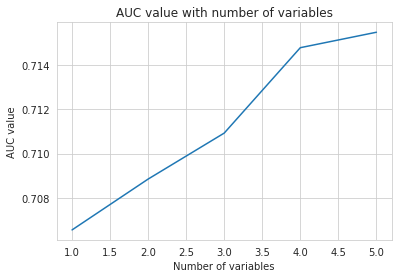

In [26]:
sns.set_style('whitegrid')
ax = sns.lineplot(x=list(range(1,6)), y=auc_values)
plt.title('AUC value with number of variables')
plt.ylabel('AUC value')
plt.xlabel('Number of variables')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = basetable.drop('target', 1)
Y = basetable['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, stratify=Y)
train = pd.concat([X_train, Y_train], axis=1)
test = pd.concat([X_test, Y_test], axis=1)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 6254 to 3738
Data columns (total 14 columns):
gender_F                 15000 non-null int64
income_high              15000 non-null int64
income_low               15000 non-null int64
country_USA              15000 non-null int64
country_India            15000 non-null int64
country_UK               15000 non-null int64
age                      15000 non-null int64
time_since_last_gift     15000 non-null int64
time_since_first_gift    15000 non-null int64
max_gift                 15000 non-null float64
min_gift                 15000 non-null float64
mean_gift                15000 non-null float64
number_gift              15000 non-null int64
target                   15000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 1.7 MB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7520 to 22866
Data columns (total 14 columns):
gender_F                 10000 non-null int64
income_high              10000 non-null int64
income_low               10000 non-null int64
country_USA              10000 non-null int64
country_India            10000 non-null int64
country_UK               10000 non-null int64
age                      10000 non-null int64
time_since_last_gift     10000 non-null int64
time_since_first_gift    10000 non-null int64
max_gift                 10000 non-null float64
min_gift                 10000 non-null float64
mean_gift                10000 non-null float64
number_gift              10000 non-null int64
target                   10000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 1.1 MB


# 3. The cumulative gains curve

# 4. Predictor insight graphs

# 4.1. Discretization of continuous variables

In [31]:
variable = 'max_gift'
number_bins = 3
basetable['disc_max_gift'] = pd.qcut(basetable[variable], number_bins)
basetable.groupby('disc_max_gift').size()

disc_max_gift
(17.999, 104.0]    8729
(104.0, 120.0]     8034
(120.0, 194.0]     8237
dtype: int64

In [32]:
basetable['income_average'] = basetable[['income_high','income_low']].mean(axis=1)
basetable.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift,disc_max_gift,income_average
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7,"(120.0, 194.0]",0.5
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1,"(17.999, 104.0]",0.0
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9,"(120.0, 194.0]",0.0
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4,"(104.0, 120.0]",0.5
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1,"(17.999, 104.0]",0.5


In [33]:
basetable['gender_M'] = 1-basetable['gender_F']
basetable.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift,disc_max_gift,income_average,gender_M
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7,"(120.0, 194.0]",0.5,0
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1,"(17.999, 104.0]",0.0,0
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9,"(120.0, 194.0]",0.0,0
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4,"(104.0, 120.0]",0.5,0
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1,"(17.999, 104.0]",0.5,0


In [34]:
basetable['gender_F'].value_counts()

1    12579
0    12421
Name: gender_F, dtype: int64

In [35]:
basetable['gender_M'].value_counts()

0    12579
1    12421
Name: gender_M, dtype: int64

In [36]:
variables_model = ['income_average','mean_gift','gender_M','min_gift','age']
variables_model

['income_average', 'mean_gift', 'gender_M', 'min_gift', 'age']

In [37]:
def check_discretize(basetable, variable, threshold):
    return len(basetable.groupby(variable)) > threshold

In [38]:
check_discretize(basetable, 'mean_gift', 5)

True

In [39]:
check_discretize(basetable, 'income_average', 5)

False

In [40]:
threshold = 5
number_bins = 5

for variable in variables_model:
    if check_discretize(basetable, variable, threshold):
        new_variable = 'disc_' + variable
        basetable[new_variable] = pd.qcut(basetable[variable], number_bins)

In [41]:
basetable.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift,disc_max_gift,income_average,gender_M,disc_mean_gift,disc_min_gift,disc_age
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7,"(120.0, 194.0]",0.5,0,"(103.0, 194.0]","(86.0, 194.0]","(59.0, 68.0]"
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1,"(17.999, 104.0]",0.0,0,"(86.857, 94.2]","(86.0, 194.0]","(68.0, 109.0]"
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9,"(120.0, 194.0]",0.0,0,"(94.2, 103.0]","(64.0, 74.0]","(18.999, 38.0]"
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4,"(104.0, 120.0]",0.5,0,"(103.0, 194.0]","(86.0, 194.0]","(49.0, 59.0]"
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1,"(17.999, 104.0]",0.5,0,"(78.0, 86.857]","(74.0, 86.0]","(68.0, 109.0]"


In [42]:
for v in list(basetable.columns):
    if 'disc' in v:
        print(v)

disc_max_gift
disc_mean_gift
disc_min_gift
disc_age


In [43]:
basetable['disc_age2'] = pd.qcut(basetable['age'], 5)
basetable['disc_age2'].unique()

[(59.0, 68.0], (68.0, 109.0], (18.999, 38.0], (49.0, 59.0], (38.0, 49.0]]
Categories (5, interval[float64]): [(18.999, 38.0] < (38.0, 49.0] < (49.0, 59.0] < (59.0, 68.0] < (68.0, 109.0]]

In [44]:
basetable['disc_age3'] = pd.cut(basetable['age'], [18,30,40,50,60,110])
basetable.groupby('disc_age3').size()

disc_age3
(18, 30]     2516
(30, 40]     3632
(40, 50]     4766
(50, 60]     6166
(60, 110]    7920
dtype: int64

# 4.2. Preparing the predictor insight graph table

In [55]:
def which_country(df):
    sumOfColumns = df['country_USA'] + df['country_India'] + df['country_UK']
    if sumOfColumns == 1:
        if df['country_USA'] == 1:
            return 'USA'
        if df['country_India'] == 1:
            return 'India'
        if df['country_UK'] == 1:
            return 'UK'
    else:
        return None

In [56]:
basetable['country'] = basetable.apply(which_country, axis=1)
basetable.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,...,number_gift,disc_max_gift,income_average,gender_M,disc_mean_gift,disc_min_gift,disc_age,disc_age2,disc_age3,country
0,0,1,0,1,0,1,0,65,530,2265,...,7,"(120.0, 194.0]",0.5,0,"(103.0, 194.0]","(86.0, 194.0]","(59.0, 68.0]","(59.0, 68.0]","(60, 110]",India
1,0,1,0,0,0,1,0,71,715,715,...,1,"(17.999, 104.0]",0.0,0,"(86.857, 94.2]","(86.0, 194.0]","(68.0, 109.0]","(68.0, 109.0]","(60, 110]",India
2,0,1,0,0,0,1,0,28,150,1806,...,9,"(120.0, 194.0]",0.0,0,"(94.2, 103.0]","(64.0, 74.0]","(18.999, 38.0]","(18.999, 38.0]","(18, 30]",India
3,0,1,0,1,1,0,0,52,725,2274,...,4,"(104.0, 120.0]",0.5,0,"(103.0, 194.0]","(86.0, 194.0]","(49.0, 59.0]","(49.0, 59.0]","(50, 60]",USA
4,0,1,1,0,1,0,0,82,805,805,...,1,"(17.999, 104.0]",0.5,0,"(78.0, 86.857]","(74.0, 86.0]","(68.0, 109.0]","(68.0, 109.0]","(60, 110]",USA


In [60]:
basetable['gender'] = basetable['gender_F'].apply(lambda x: 'M' if x == 0 else 'F')
basetable.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,...,disc_max_gift,income_average,gender_M,disc_mean_gift,disc_min_gift,disc_age,disc_age2,disc_age3,country,gender
0,0,1,0,1,0,1,0,65,530,2265,...,"(120.0, 194.0]",0.5,0,"(103.0, 194.0]","(86.0, 194.0]","(59.0, 68.0]","(59.0, 68.0]","(60, 110]",India,F
1,0,1,0,0,0,1,0,71,715,715,...,"(17.999, 104.0]",0.0,0,"(86.857, 94.2]","(86.0, 194.0]","(68.0, 109.0]","(68.0, 109.0]","(60, 110]",India,F
2,0,1,0,0,0,1,0,28,150,1806,...,"(120.0, 194.0]",0.0,0,"(94.2, 103.0]","(64.0, 74.0]","(18.999, 38.0]","(18.999, 38.0]","(18, 30]",India,F
3,0,1,0,1,1,0,0,52,725,2274,...,"(104.0, 120.0]",0.5,0,"(103.0, 194.0]","(86.0, 194.0]","(49.0, 59.0]","(49.0, 59.0]","(50, 60]",USA,F
4,0,1,1,0,1,0,0,82,805,805,...,"(17.999, 104.0]",0.5,0,"(78.0, 86.857]","(74.0, 86.0]","(68.0, 109.0]","(68.0, 109.0]","(60, 110]",USA,F


In [61]:
'''Calculates the predictor insight graph table'''
def create_pig_table(df, target, variable):
    '''Group by the variable you want to plot'''
    groups = df[[target, variable]].groupby(variable)
    
    '''Calculate the size and incidence of each group'''
    pig_table = groups[target].agg({'Incidence': np.mean, 'Size': np.size}).reset_index()
    return pig_table

In [62]:
create_pig_table(basetable, 'target', 'country')

,country,Incidence,Size
0,India,0.049439,12379
1,UK,0.047881,2548
2,USA,0.044972,10073


In [63]:
variables = ['country', 'gender', 'disc_mean_gift', 'age']
pig_tables = {}

In [64]:
for variable in variables:
    pig_table = create_pig_table(basetable, 'target', variable)
    pig_tables[variable] = pig_table

In [66]:
pig_tables['country']

,country,Incidence,Size
0,India,0.049439,12379
1,UK,0.047881,2548
2,USA,0.044972,10073


In [67]:
pig_tables['gender']

,gender,Incidence,Size
0,F,0.050004,12579
1,M,0.044924,12421


In [68]:
pig_tables['disc_mean_gift']

,disc_mean_gift,Incidence,Size
0,"(17.999, 78.0]",0.013596,5075
1,"(78.0, 86.857]",0.028827,4926
2,"(86.857, 94.2]",0.037894,5014
3,"(94.2, 103.0]",0.059740,5072
4,"(103.0, 194.0]",0.098311,4913


In [69]:
pig_tables['age']

,age,Incidence,Size
0,19,0.015873,126
1,20,0.028986,138
2,21,0.037267,161
3,22,0.041667,168
4,23,0.055866,179
5,24,0.050505,198
6,25,0.032407,216
7,26,0.053498,243
8,27,0.024793,242
9,28,0.053004,283


# 4.3. Plotting the predictor insight graph

In [73]:
pig_tables['gender']

TypeError: must be str, not float

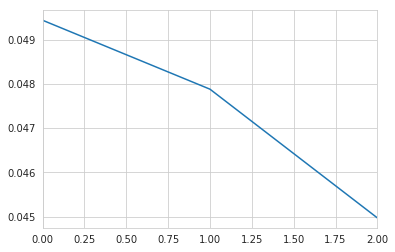

In [74]:
pig_tables['country']['Incidence'].plot()
plt.show()